<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">PENGANTAR DATA SCIENCE</div>
<div>Eksplorasi Dataset Banking</div>
<hr>
<div>6182001004 | William Surya Wijaya - 6182001005 | Kae Zarren L H - 6182001042 | Ester Oka N</div>

In [2]:
#import library
import pandas as pd; from matplotlib import pyplot as plt; import requests;

In [3]:
#import and load dataset
url = ['https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/BANK_INFO.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/BANK_TELCO_ID.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/AGGREGATED_TELCO_TRANSACTIONS.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/MOBILE_OS.csv'];

bankInfo = pd.read_csv(url[0], sep=",", encoding='cp1252');
bankTelcoId = pd.read_csv(url[1], sep=",", encoding='cp1252');
aggrTelcoTrans = pd.read_csv(url[2], sep=",", encoding='cp1252');
mobileOS = pd.read_csv(url[3], sep=",", encoding='cp1252');

In [4]:
#fix dataset

#fix mobileOS column name
mobileOS.rename(columns={'samsung' : 'SAMSUNG'}, inplace=True);

In [5]:
userMobileOS = mobileOS[['BANK_ID']];
gadgetMobileOS = mobileOS[['MOBILE','TABLET']];
newMobileOS = mobileOS[['SAMSUNG','OPPO','HUAWEI','SONY','XIAOMI','LENOVO','ASUS','VIVO']];
osMobileOS = mobileOS[['ANDROID','IPHONE_IOS11']];

In [6]:
#check userMobileOS columns value
for col in userMobileOS.columns:
    print('[!]',col,'\n    Unique Value : ',userMobileOS[col].unique(),'\n    Unique Total : ',len(userMobileOS[col].unique()))

print('\n[?] Any (null) value ?',userMobileOS.isnull().values.any());

[!] BANK_ID 
    Unique Value :  [10001 10002 10004 ... 29330 29331 29332] 
    Unique Total :  15005

[?] Any (null) value ? False


In [7]:
#check gadgetMobileOS columns value
for col in gadgetMobileOS.columns:
    print('[!]',col,'\n    Unique Value : ',gadgetMobileOS[col].unique(),'\n    Unique Total : ',len(gadgetMobileOS[col].unique()))

print('\n[?] Any (null) value ?',gadgetMobileOS.isnull().values.any());

[!] MOBILE 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] TABLET 
    Unique Value :  [0 1] 
    Unique Total :  2

[?] Any (null) value ? False


In [8]:
#check osMobileOS columns value
for col in osMobileOS.columns:
    print('[!]',col,'\n    Unique Value : ',osMobileOS[col].unique(),'\n    Unique Total : ',len(osMobileOS[col].unique()))

print('\n[?] Any (null) value ?',osMobileOS.isnull().values.any());

[!] ANDROID 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] IPHONE_IOS11 
    Unique Value :  [0 1] 
    Unique Total :  2

[?] Any (null) value ? False


In [141]:
#check newMobileOS columns value
for col in newMobileOS.columns:
    print('[!]',col,'\n    Unique Value : ',newMobileOS[col].unique(),'\n    Unique Total : ',len(newMobileOS[col].unique()))

print('\n[?] Any (null) value ?',newMobileOS.isnull().values.any());

[!] SAMSUNG 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] OPPO 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] HUAWEI 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] SONY 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] XIAOMI 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] LENOVO 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] ASUS 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] VIVO 
    Unique Value :  [0 1] 
    Unique Total :  2

[?] Any (null) value ? False


In [9]:
#user mobile data - bankInfo & mobile OS left join
userMobile = bankInfo.merge(mobileOS, on='BANK_ID', how='left', indicator=True);
print(userMobile.head(5));

   BANK_ID  AGE MARITAL_STATUS  GENDER                      EDUCATION  \
0    13398   42         Single    Male  No Formal Education / Unknown   
1    16152   37        Married    Male  No Formal Education / Unknown   
2    18560   34         Single    Male  No Formal Education / Unknown   
3    18568   34        Married    Male            College/ University   
4    26717   26         Single  Female                            NaN   

                          STATE  \
0          Selangor Darul Ehsan   
1  Negeri Sembilan Darul Khusus   
2  Negeri Sembilan Darul Khusus   
3          Selangor Darul Ehsan   
4              Kedah Darul Aman   

                                          OCCUPATION               OCC_DESC  \
0  Associate Professionals, Administrative/Specia...  MANAGER OR SUPERVISOR   
1  Associate Professionals/Technician/Asst/Superv...                 OTHERS   
2  Clerical Support Workers, Office - General Off...          NON-EXECUTIVE   
3  Associate Professionals/Technic

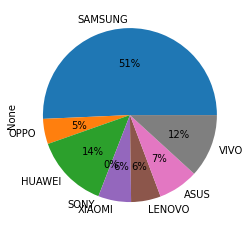

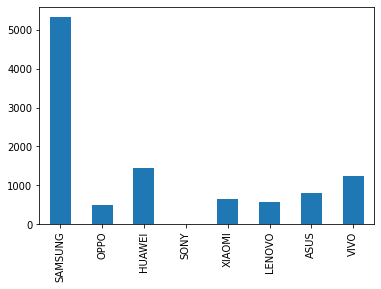

In [10]:
newMobileOS[newMobileOS.columns[0:]].sum().plot(kind='pie', y='', autopct='%1.0f%%'); plt.show();
newMobileOS[newMobileOS.columns[0:]].sum().plot(kind='bar', y=''); plt.show();